In [38]:
import yfinance as yf
#yfinance is a popular open source library means to access the financial data available on Yahoo Finance.
#Yahoo Finance offers an excellent range of market data on stocks, bonds, currencies and cryptocurrencies. It also offers market news, reports and analysis and additionally options and fundamentals data- setting it apart from some of it’s competitors.

In [39]:

from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [40]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [41]:
google_data.head()
 #adj close nd close files almost dme but adj close file is consider factores like evidence , stock price,stock ofference,price is more accurate

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512


In [42]:
google_data.shape

(4993, 6)

In [43]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000,4.993000e+03
mean,44.506401,44.976559,44.061948,44.530464,44.480171,1.162824e+08
std,42.249219,42.719823,41.835891,42.291575,42.244525,1.500234e+08
min,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05
25%,12.971380,13.131032,12.846349,12.991804,12.977036,2.755545e+07
50%,26.921249,27.118048,26.719143,26.920000,26.889400,5.699605e+07
75%,59.799999,60.250500,59.352001,59.862499,59.794456,1.438130e+08
max,179.750000,182.080002,177.779999,179.559998,179.559998,1.650833e+09


In [44]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4993 entries, 2004-08-19 to 2024-06-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4993 non-null   float64
 1   High       4993 non-null   float64
 2   Low        4993 non-null   float64
 3   Close      4993 non-null   float64
 4   Adj Close  4993 non-null   float64
 5   Volume     4993 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 273.1 KB


In [45]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

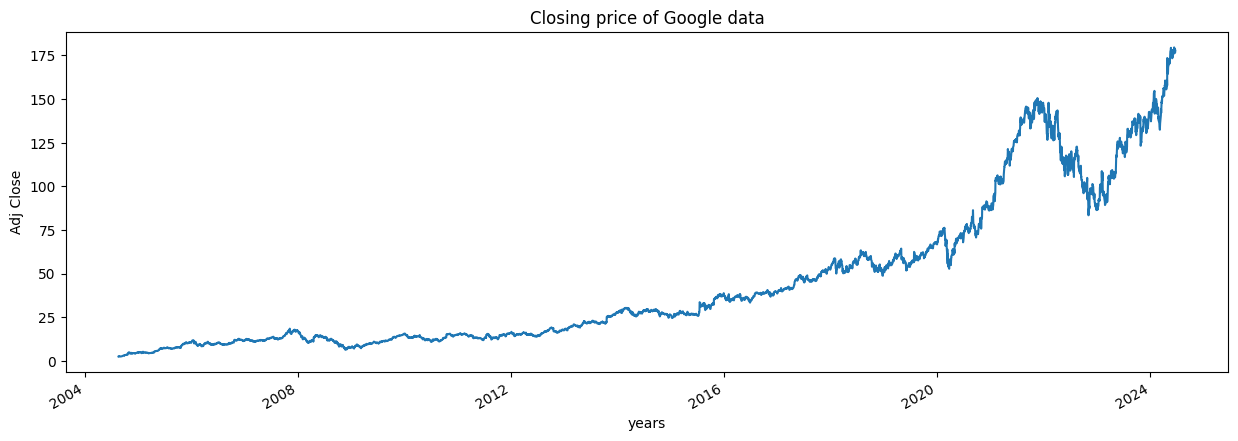

In [47]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [48]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [49]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

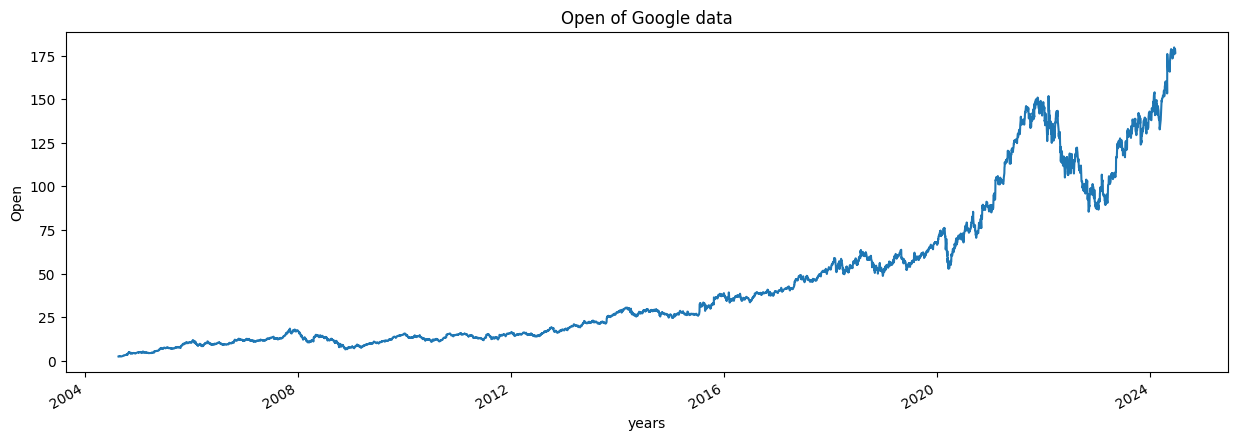

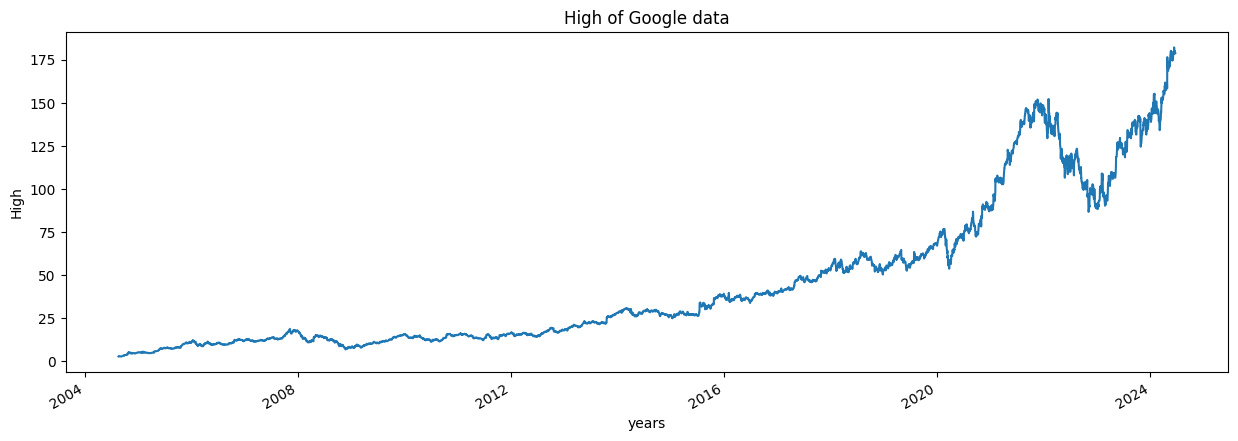

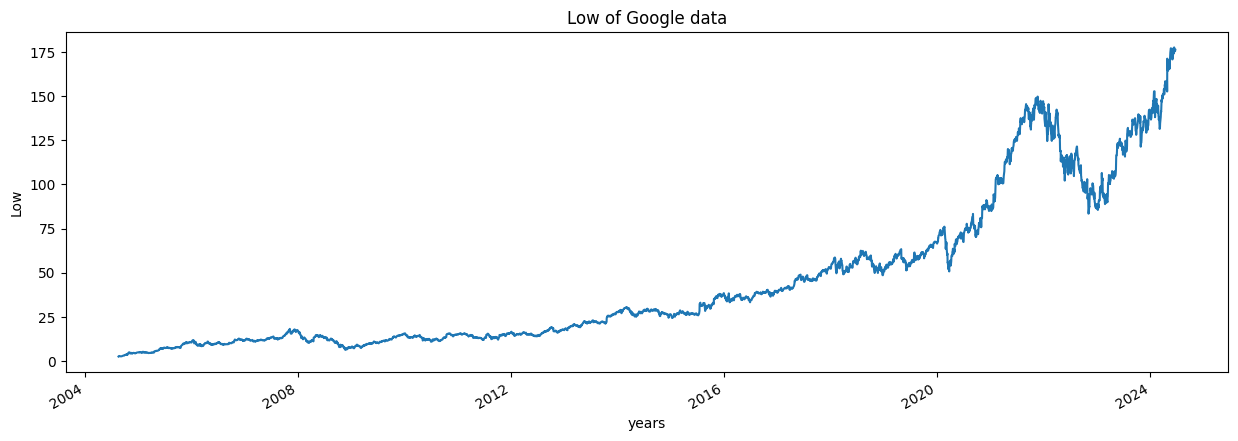

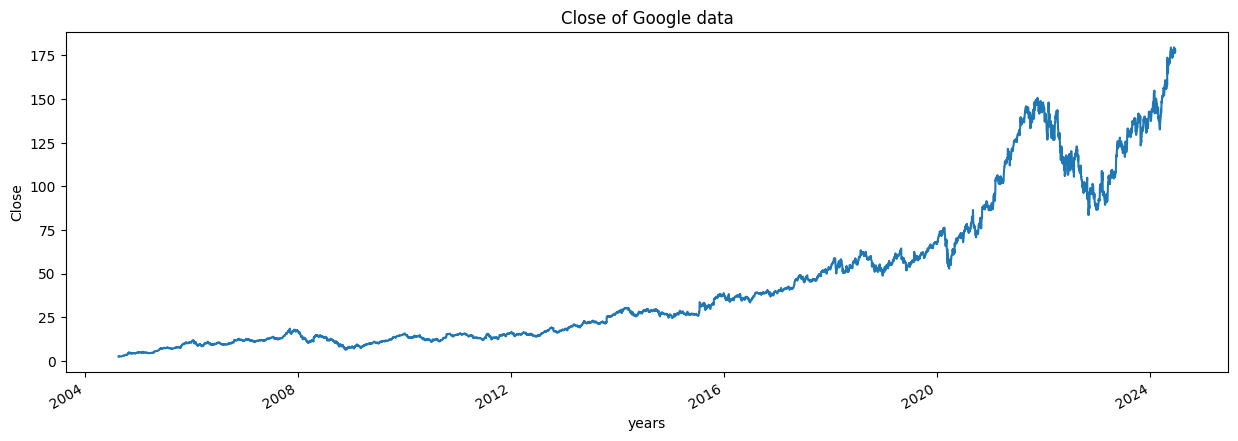

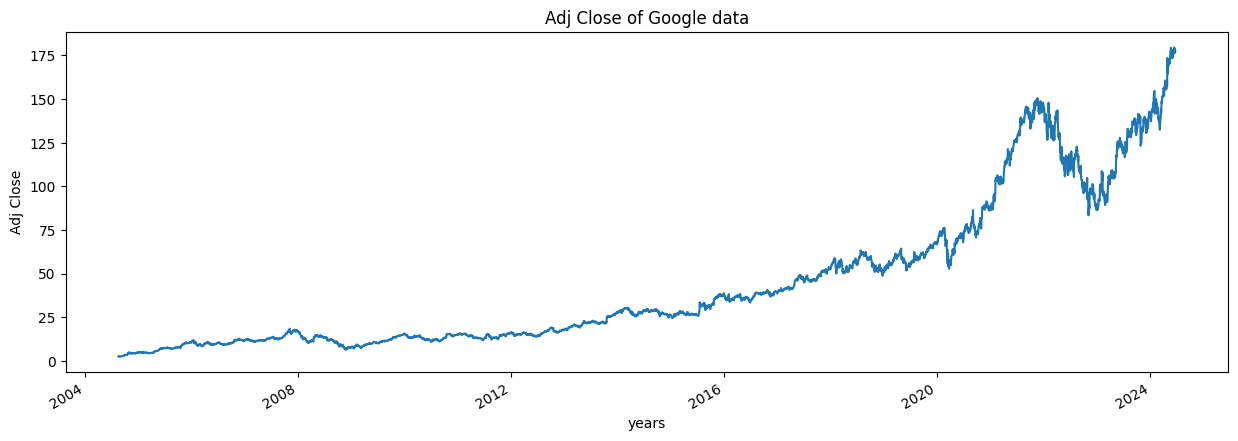

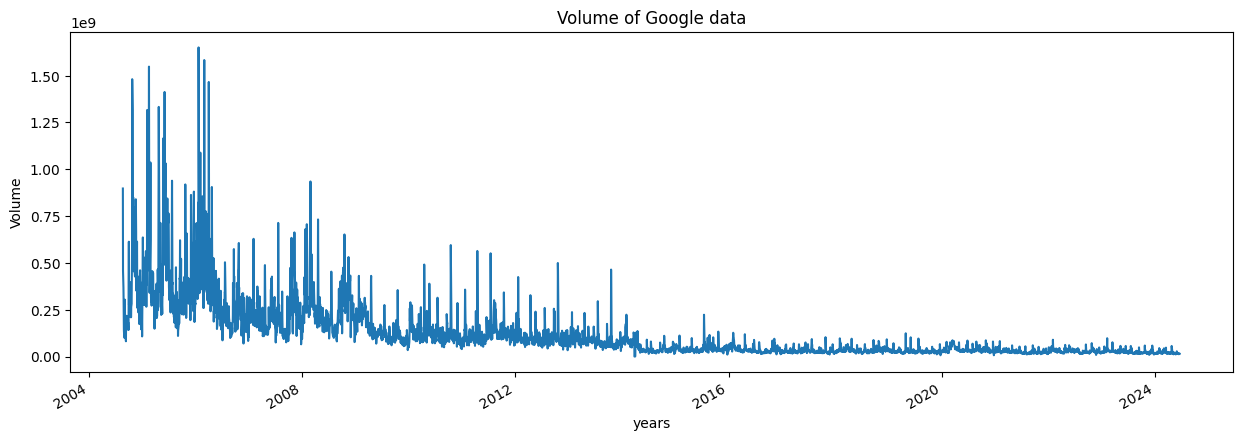

In [50]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [51]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60

In [52]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [53]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [54]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [55]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 118


In [56]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [57]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.028317
Name: MA_for_250_days, dtype: float64

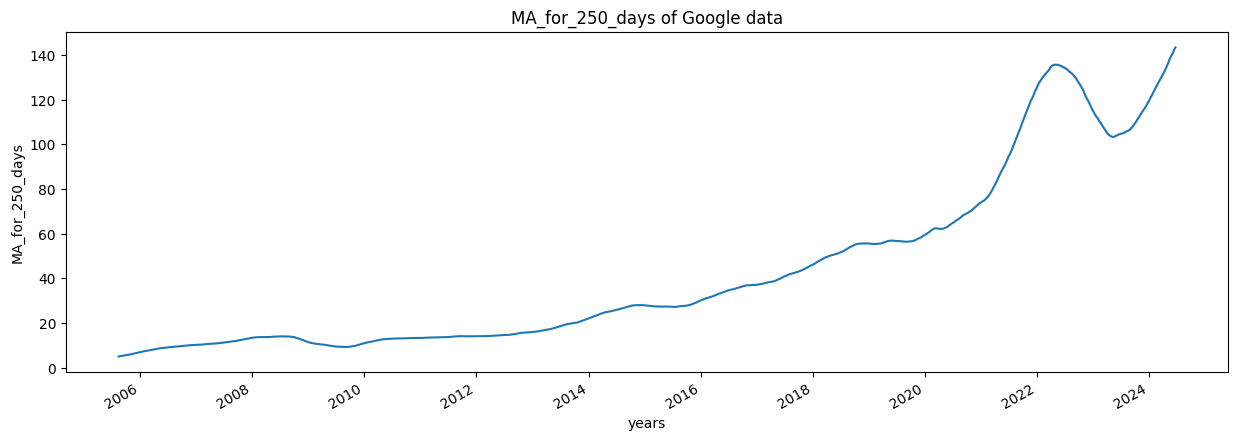

In [58]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')


<Figure size 640x480 with 0 Axes>

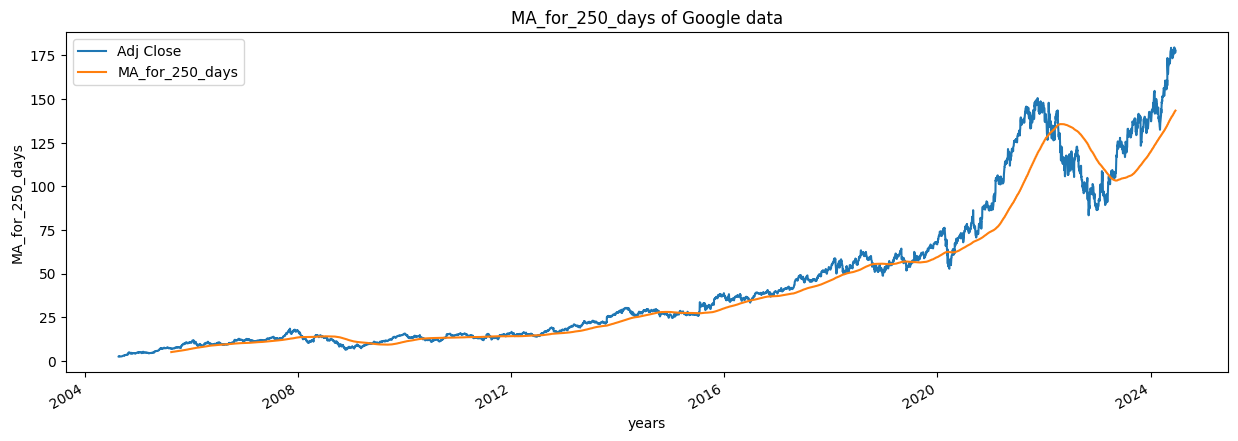

In [59]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')


<Figure size 640x480 with 0 Axes>

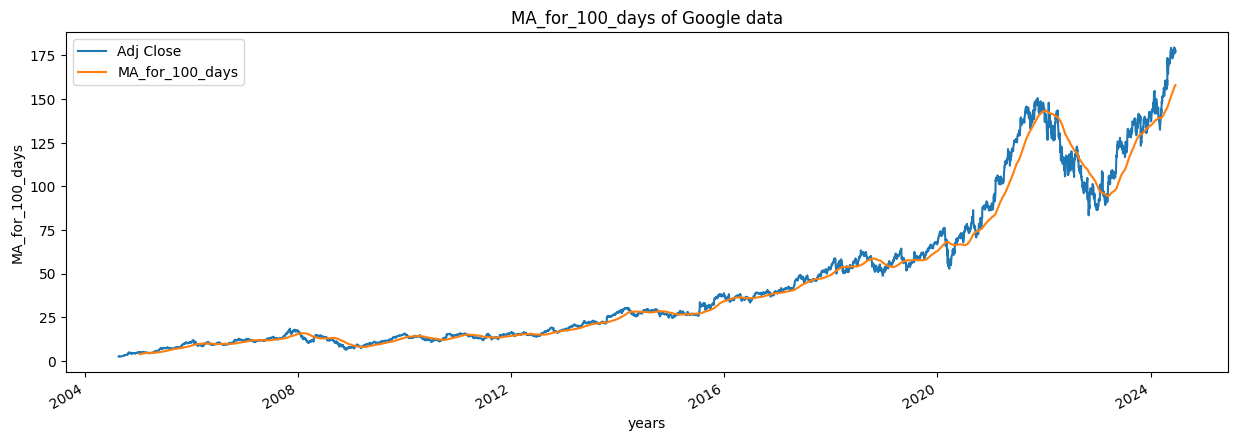

In [60]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')


<Figure size 640x480 with 0 Axes>

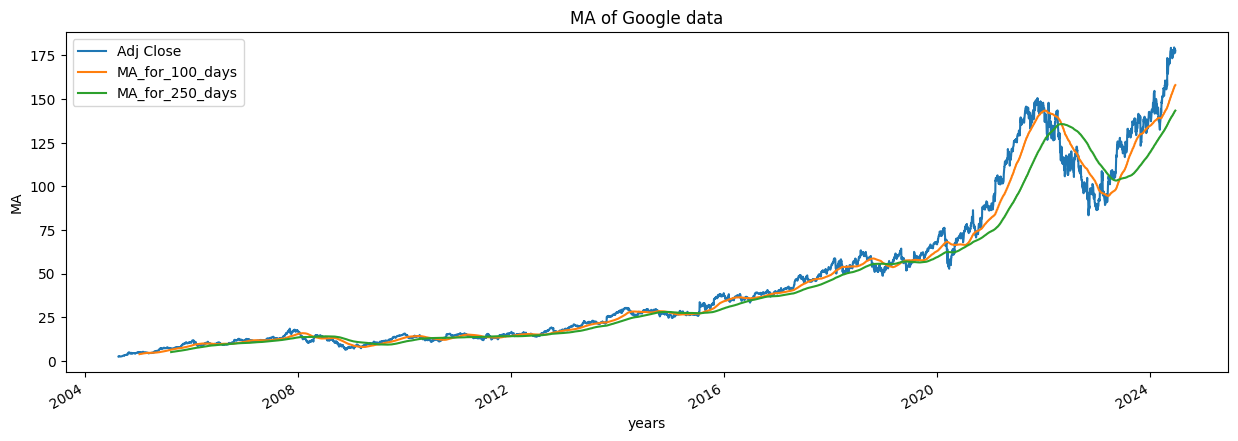

In [61]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [62]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.496292,NaN
2004-08-20,2.694573,0.079430
2004-08-23,2.721690,0.010064
2004-08-24,2.608991,-0.041408
2004-08-25,2.637103,0.010775


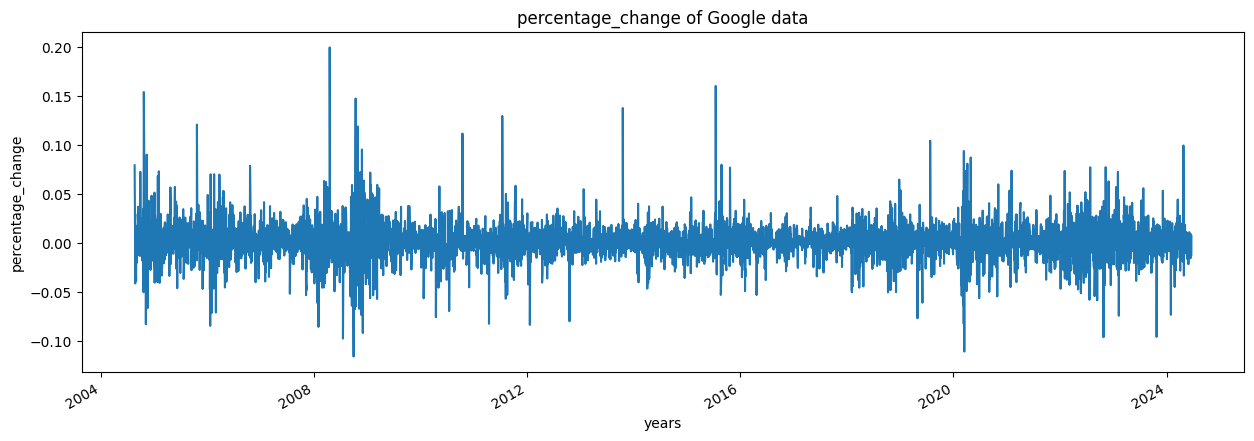

In [63]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')


In [64]:
Adj_close_price = google_data[['Adj Close']]

In [65]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([179.55999756]), array([2.48808169]))

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.63690642e-05],
       [1.16614197e-03],
       [1.31928457e-03],
       ...,
       [9.95595017e-01],
       [9.82436511e-01],
       [9.89552319e-01]])

In [67]:
len(scaled_data)

4993

In [68]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [69]:
x_data[0],y_data[0]

(array([[4.63690642e-05],
        [1.16614197e-03],
        [1.31928457e-03],
        [6.82825469e-04],
        [8.41586800e-04],
        [1.10994113e-03],
        [8.62661444e-04],
        [2.81000191e-04],
        [3.31578260e-04],
        [3.37218541e-05],
        [2.10747787e-04],
        [0.00000000e+00],
        [2.20584955e-04],
        [3.21746478e-04],
        [3.23149479e-04],
        [7.47455096e-04],
        [1.05233459e-03],
        [1.61292658e-03],
        [1.68457930e-03],
        [1.96135971e-03],
        [2.45591773e-03],
        [2.71864793e-03],
        [2.50509010e-03],
        [2.58095586e-03],
        [2.92377833e-03],
        [2.78468191e-03],
        [2.56410234e-03],
        [3.77238687e-03],
        [4.36529098e-03],
        [4.15735189e-03],
        [4.57603877e-03],
        [4.92447190e-03],
        [5.38952246e-03],
        [5.20828213e-03],
        [5.45696078e-03],
        [5.29960514e-03],
        [4.95257502e-03],
        [5.25324146e-03],
        [5.7

In [70]:
int(len(x_data)*0.7)

3425

In [71]:
4908-100-int(len(x_data)*0.7)

1383

In [72]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [73]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(3425, 100, 1)
(3425, 1)
(1468, 100, 1)
(1468, 1)


In [74]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [75]:

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [77]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)


Epoch 1/2
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 79s 22ms/step - loss: 2.3099e-04
Epoch 2/2
3425/3425 ━━━━━━━━━━━━━━━━━━━━ 79s 23ms/step - loss: 4.9708e-05


In [78]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [79]:
predictions = model.predict(x_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [80]:
predictions

array([[0.32217738],
       [0.3224471 ],
       [0.32204086],
       ...,
       [0.91768044],
       [0.91989857],
       [0.91451293]], dtype=float32)

In [81]:

inv_predictions = scaler.inverse_transform(predictions)
inv_predictions


array([[ 59.536648],
       [ 59.584408],
       [ 59.512474],
       ...,
       [164.98352 ],
       [165.37628 ],
       [164.42264 ]], dtype=float32)

In [82]:

inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 60.31985855],
       [ 60.01271057],
       [ 60.29788589],
       ...,
       [178.77999878],
       [176.44999695],
       [177.71000671]])

In [83]:


rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [84]:

rmse
#root mean squared error 


5.366910526737199

In [85]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()


,original_test_data,predictions
Date,,
2018-08-20,60.319859,59.536648
2018-08-21,60.012711,59.584408
2018-08-22,60.297886,59.512474
2018-08-23,60.200497,59.602505
2018-08-24,60.963127,59.604370


<Figure size 640x480 with 0 Axes>

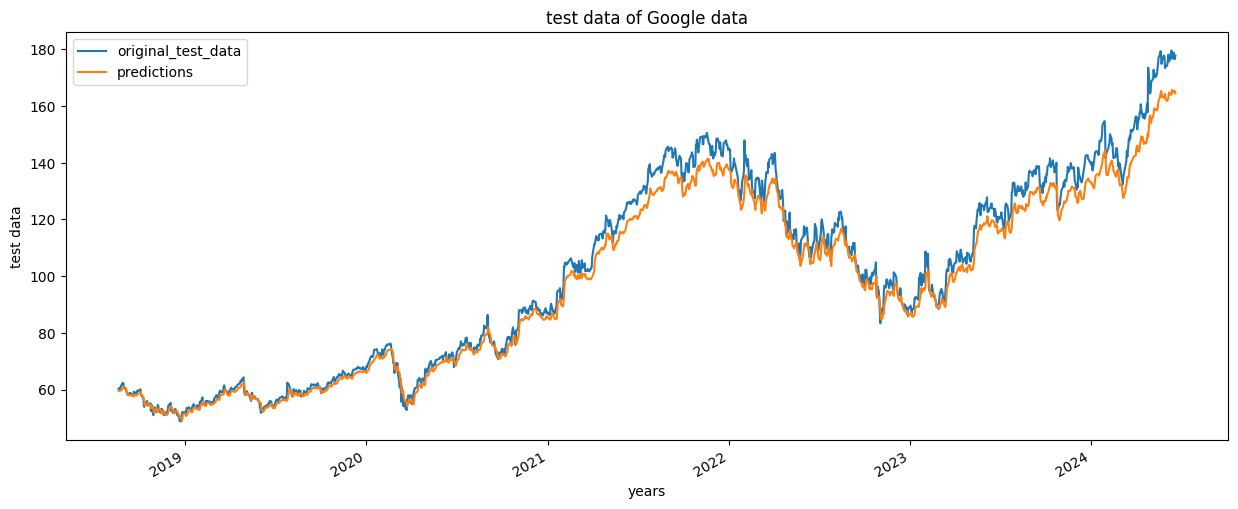

In [86]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

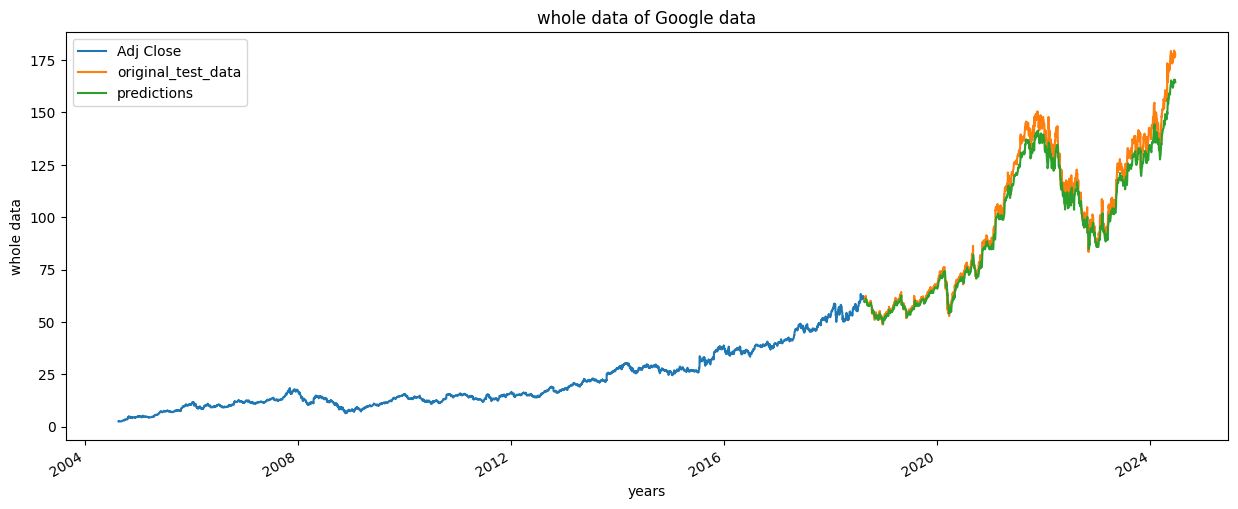

In [87]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [88]:
model.save("Latest_stock_price_model.keras")